<a href="https://colab.research.google.com/github/MoonRiver75/Python-for-physics-/blob/main/proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

En este informe, vamos a explorar cómo les va a los estudiantes en materias como Matemáticas, Lectura y Escritura. También examinaremos aspectos adicionales, como la preparación para exámenes, el género, la raza, la educación de los padres y el tipo de almuerzo.

El objetivo es entender por qué algunos estudiantes tienen un mejor desempeño que otros. Al analizar estos datos, buscamos patrones que nos ayuden a encontrar formas de mejorar el rendimiento académico.

Significado de los campos:
- **Math Score:** Notas de Matemáticas.
- **Reading Score:** Notas de Lectura.
- **Writing Score:** Notas de Escritura.
- **Gender:** Género (chico o chica).
- **Race/Ethnicity:** Raza o etnicidad.
- **Parental level of education:** Nivel educativo de los padres.
- **Lunch:** Almuerzo (pagan o gratuito/reducido según ingresos).
- **Test preparation course:** Curso de preparación para exámenes (completado o no realizado).

# Cargar Librerias


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

In [ ]:
de = pd.read_csv('/content/StudentsPerformance.csv')
de_limpio = de.dropna()


In [ ]:
# Seleccionar solo las columnas numéricas
columnas_numericas = ['math score', 'writing score', 'reading score']
de_numerico = de[columnas_numericas]

# Escalar utilizando MinMaxScaler
scaler = preprocessing.MinMaxScaler()
minmax = scaler.fit_transform(de_numerico)
minmax = pd.DataFrame(minmax, columns=columnas_numericas)

# Escalar utilizando StandardScaler
scaler = preprocessing.StandardScaler()
standard = scaler.fit_transform(de_numerico)
standard = pd.DataFrame(standard, columns=columnas_numericas)

# Escalar utilizando RobustScaler
scaler = preprocessing.RobustScaler()
robust = scaler.fit_transform(de_numerico)
robust = pd.DataFrame(robust, columns=columnas_numericas)


In [ ]:
print('\033[1m'+'Without scaling:'+'\033[0m')
display(de.head())
print('*' * 45)
print('\033[1m'+'With minmax scaling:'+'\033[0m')
display(minmax.head())
print('*' * 45)
print('\033[1m'+'With standard scaling:'+'\033[0m')
display(standard.head())
print('*' * 45 )
print('\033[1m'+'With robust scaling:'+'\033[0m')
display(robust.head())

Without scaling:


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


*********************************************
With minmax scaling:


,math score,writing score,reading score
0,0.72,0.711111,0.662651
1,0.69,0.866667,0.879518
2,0.90,0.922222,0.939759
3,0.47,0.377778,0.481928
4,0.76,0.722222,0.734940


*********************************************
With standard scaling:


,math score,writing score,reading score
0,0.390024,0.391492,0.193999
1,0.192076,1.313269,1.427476
2,1.577711,1.642475,1.770109
3,-1.259543,-1.583744,-0.833899
4,0.653954,0.457333,0.605158


*********************************************
With robust scaling:


,math score,writing score,reading score
0,0.30,0.235294,0.10
1,0.15,0.894118,1.00
2,1.20,1.129412,1.25
3,-0.95,-1.176471,-0.65
4,0.50,0.282353,0.40


In [ ]:
de.shape

(1000, 8)

In [ ]:
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    print('\n'+col+':', de[col].nunique())
    print(de[col].unique())


gender: 2
['female' 'male']

race/ethnicity: 5
['group B' 'group C' 'group A' 'group D' 'group E']

parental level of education: 6
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']

lunch: 2
['standard' 'free/reduced']

test preparation course: 2
['none' 'completed']


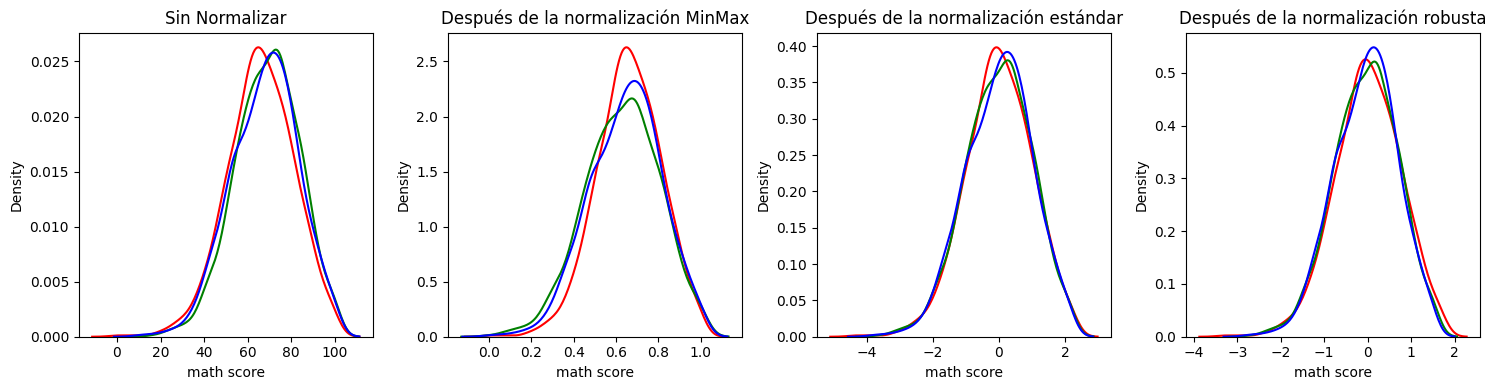

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 4, 1)
sns.kdeplot(de['math score'], color='red')
sns.kdeplot(de['reading score'], color='green')
sns.kdeplot(de['writing score'], color='blue')
plt.title('Sin Normalizar')

plt.subplot(1, 4, 2)
sns.kdeplot(minmax['math score'], color='red')
sns.kdeplot(minmax['reading score'], color='green')
sns.kdeplot(minmax['writing score'], color='blue')
plt.title('Después de la normalización MinMax')

plt.subplot(1, 4, 3)
sns.kdeplot(standard['math score'], color='red')
sns.kdeplot(standard['reading score'], color='green')
sns.kdeplot(standard['writing score'], color='blue')
plt.title('Después de la normalización estándar')

plt.subplot(1, 4, 4)
sns.kdeplot(robust['math score'], color='red')
sns.kdeplot(robust['reading score'], color='green')
sns.kdeplot(robust['writing score'], color='blue')
plt.title('Después de la normalización robusta')

plt.tight_layout()
plt.show()


array([[<Axes: title={'center': 'math score'}>,
        <Axes: title={'center': 'reading score'}>],
       [<Axes: title={'center': 'writing score'}>, <Axes: >]],
      dtype=object)

<Figure size 2000x1500 with 0 Axes>

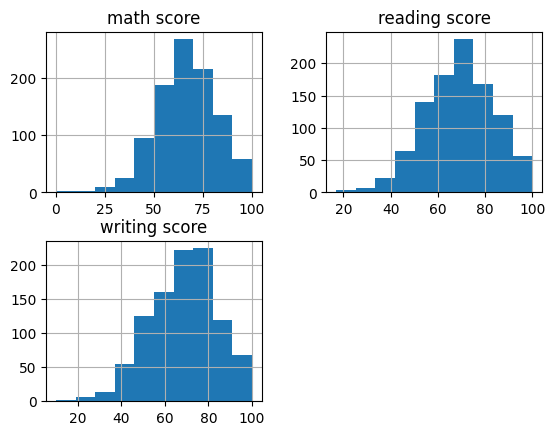

In [ ]:
plt.figure(figsize=(20, 15))
de.hist()

<ipython-input-97-b122c34b60b9>:20: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_relacion = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)


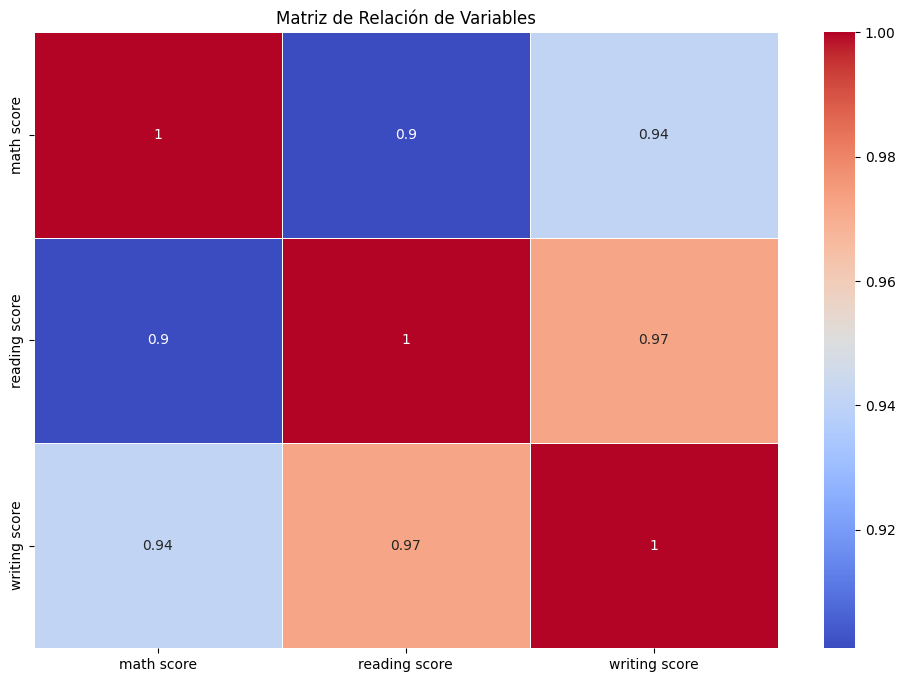

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un DataFrame con los datos proporcionados
datos = {
    'gender': ['female', 'female', 'female', 'male', 'male', 'female', 'female', 'male', 'male', 'female'],
    'race/ethnicity': ['group B', 'group C', 'group B', 'group A', 'group C', 'group B', 'group B', 'group B', 'group D', 'group B'],
    'parental level of education': ["bachelor's degree", 'some college', "master's degree", "associate's degree", 'some college', "associate's degree", 'some college', 'some college', 'high school', 'high school'],
    'lunch': ['standard', 'standard', 'standard', 'free/reduced', 'standard', 'standard', 'standard', 'free/reduced', 'free/reduced', 'free/reduced'],
    'test preparation course': ['none', 'completed', 'none', 'none', 'none', 'none', 'completed', 'none', 'completed', 'none'],
    'math score': [72, 69, 90, 47, 76, 71, 88, 40, 64, 38],
    'reading score': [72, 90, 95, 57, 78, 83, 95, 43, 64, 60],
    'writing score': [74, 88, 93, 44, 75, 78, 92, 39, 67, 50]
}

df = pd.DataFrame(datos)

# Crear una matriz de relación (heatmap)
plt.figure(figsize=(12, 8))
matriz_relacion = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
matriz_relacion.set_title('Matriz de Relación de Variables')

# Mostrar la matriz de relación
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


  parental level of education  math score  reading score  writing score  \
0           bachelor's degree          72             72             74   
1                some college          69             90             88   
2             master's degree          90             95             93   
3          associate's degree          47             57             44   
4                some college          76             78             75   
5          associate's degree          71             83             78   
6                some college          88             95             92   
7                some college          40             43             39   
8                 high school          64             64             67   
9                 high school          38             60             50   

   cluster  
0        2  
1        3  
2        0  
3        1  
4        2  
5        2  
6        0  
7        1  
8        4  
9        1  


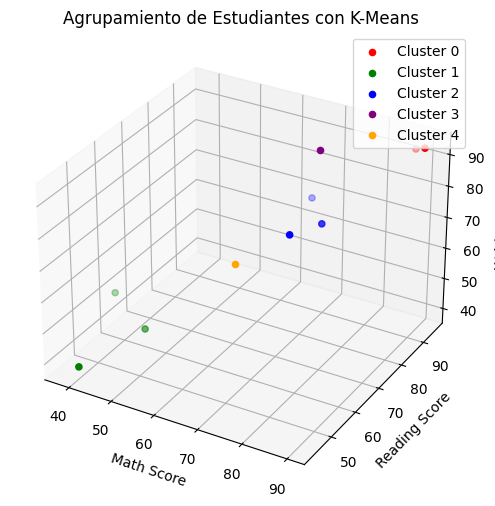

In [ ]:




features = df[['math score', 'reading score', 'writing score']].values

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(features)

print(df[['parental level of education', 'math score', 'reading score', 'writing score', 'cluster']])


fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'purple', 'orange']


for i, color in enumerate(colors):
    cluster_data = df[df['cluster'] == i]
    ax.scatter(cluster_data['math score'], cluster_data['reading score'], cluster_data['writing score'], c=color, label=f'Cluster {i}')

ax.set_xlabel('Math Score')
ax.set_ylabel('Reading Score')
ax.set_zlabel('Writing Score')
ax.set_title('Agrupamiento de Estudiantes con K-Means')
ax.legend()
plt.show()


En la matriz de relación, se observa una fuerte correlación positiva entre las variables writing score y reading score. Esto significa que, en general, cuando el puntaje de escritura de un estudiante es alto, es probable que también tenga un puntaje alto en lectura, y viceversa.

Este hallazgo no es sorprendente, ya que las habilidades de lectura y escritura a menudo están relacionadas. Un estudiante que tiene fuertes habilidades de lectura puede ser capaz de comprender mejor los conceptos y expresar sus ideas de manera más efectiva al escribir. De manera similar, un buen desempeño en escritura puede indicar una comprensión sólida de la lengua y la capacidad para comunicarse de manera efectiva.





In [ ]:
de.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
de.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
de.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [ ]:
de[['math score', 'reading score', 'writing score']].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


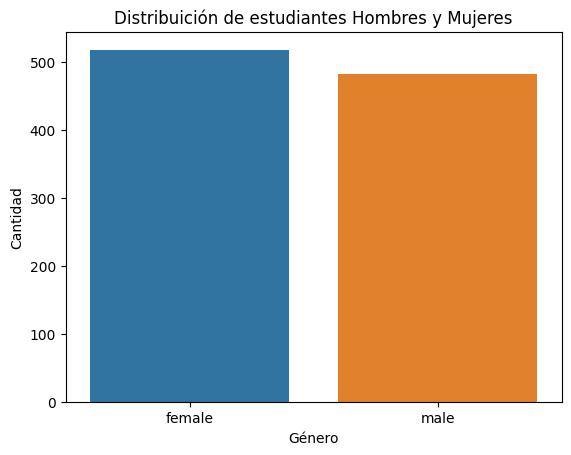

In [ ]:
sb.countplot(data=de,x=de['gender'])
plt.xlabel('Género')
plt.ylabel('Cantidad')
plt.title('Distribuición de estudiantes Hombres y Mujeres')
plt.show()

Existen mas mujeres registradas que hombres en el dataset

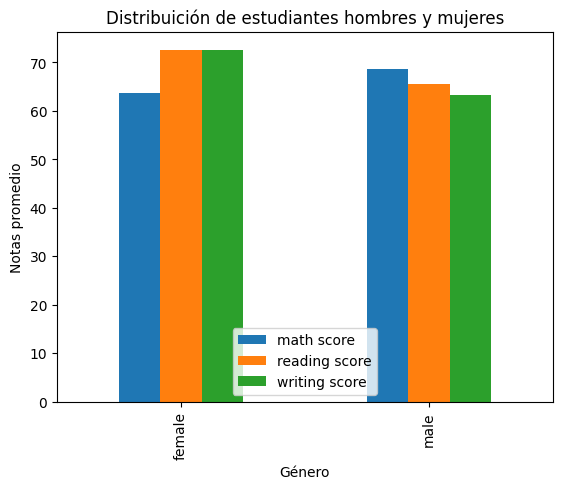

In [ ]:
scores = de.groupby('gender')[['math score','reading score','writing score']].mean()
scores.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Notas promedio')
plt.title('Distribuición de estudiantes hombres y mujeres')
plt.show()

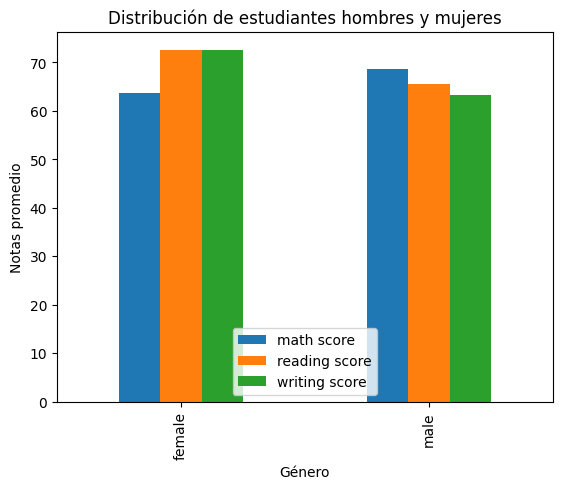

In [ ]:
scores = de.groupby('gender')[['math score','reading score','writing score']].mean()
scores.plot(kind='bar')
plt.xlabel('Género')
plt.ylabel('Notas promedio')
plt.title('Distribución de estudiantes hombres y mujeres')
plt.show()


Las mujeres tienen un mejor perfomance en lectura y escritural, mientras que los hombres tiene mayor puntaje en matematicas

<Axes: xlabel='lunch', ylabel='math score'>

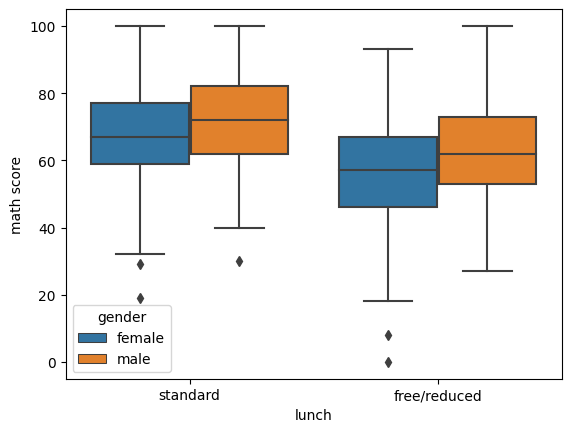

In [ ]:
sb.boxplot(data=de, x='lunch', y='math score', hue='gender')


Los estudiantes que pagan por sus almuerzos obtienen un rendimiento superior en matemáticas en comparación con los que reciben almuerzos gratuitos o a precio reducido. Esto indica que los estudiantes de hogares con ingresos más altos pueden dedicar más tiempo y atención a sus estudios, lo que posiblemente contribuye a un entorno de aprendizaje más enfocado y propicio.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, "bachelor's degree"),
  Text(1, 0, 'some college'),
  Text(2, 0, "master's degree"),
  Text(3, 0, "associate's degree"),
  Text(4, 0, 'high school'),
  Text(5, 0, 'some high school')])

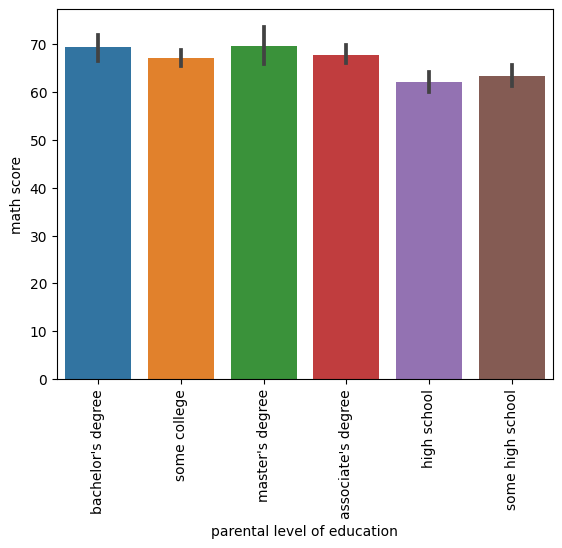

In [ ]:
sns.barplot(x='parental level of education', y='math score',data=de)
plt.xticks(rotation=90)

el nivel educativo más alto alcanzado por los padres varía desde la educación de posgrado hasta el nivel de educación secundaria. Observamos que algunos padres han completado estudios de maestría, mientras que otros solo han alcanzado el nivel de educación secundaria.

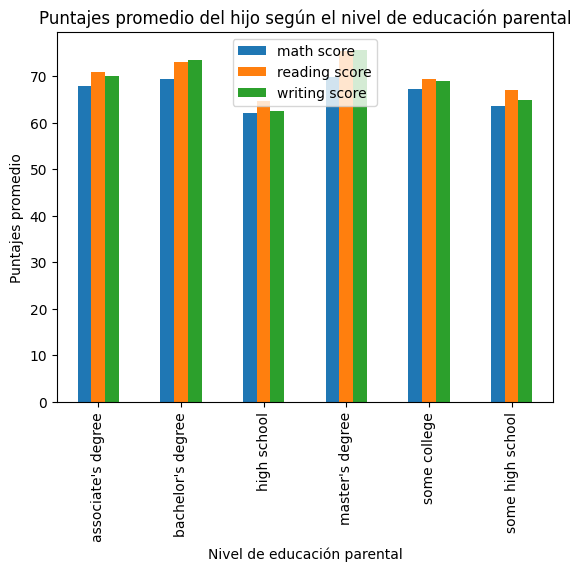

In [ ]:
parent=de.groupby('parental level of education')[['math score','reading score','writing score']].mean()

parent.plot(kind='bar')
plt.xlabel('Nivel de educación parental')
plt.ylabel('Puntajes promedio')
plt.title('Puntajes promedio del hijo según el nivel de educación parental')
plt.show()

Los padres con educación universitaria tienen hijos con puntajes más altos en comparación con aquellos cuyos padres solo completaron la escuela secundaria o asistieron a la universidad de manera intermitente, sin tener un degree o una continuación de estudios.

In [ ]:
from IPython.display import display

for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    display(de.groupby(col).agg({
        col: 'count',
        'math score': ['mean', 'median'],
        'reading score': ['mean', 'median'],
        'writing score': ['mean', 'median']}
    ))

gender math score        reading score        writing score       
        count       mean median          mean median          mean median
gender                                                                   
female    518  63.633205   65.0     72.608108   73.0     72.467181   74.0
male      482  68.728216   69.0     65.473029   66.0     63.311203   64.0

race/ethnicity math score        reading score         \
                        count       mean median          mean median   
race/ethnicity                                                         
group A                    89  61.629213   61.0     64.674157   64.0   
group B                   190  63.452632   63.0     67.352632   67.0   
group C                   319  64.463950   65.0     69.103448   71.0   
group D                   262  67.362595   69.0     70.030534   71.0   
group E                   140  73.821429   74.5     73.028571   74.0   

               writing score         
                        mean median  
race/ethnicity                       
group A            62.674157   62.0  
group B            65.600000   67.0  
group C            67.827586   68.0  
group D            70.145038   72.0  
group E            71.407143   72.0

parental level of education math score         \
                                                  count       mean median   
parental level of education                                                 
associate's degree                                  222  67.882883   67.0   
bachelor's degree                                   118  69.389831   68.0   
high school                                         196  62.137755   63.0   
master's degree                                      59  69.745763   73.0   
some college                                        226  67.128319   67.5   
some high school                                    179  63.497207   65.0   

                            reading score        writing score         
                                     mean median          mean median  
parental level of education                                            
associate's degree              70.927928   72.5     69.896396   70.5  
bachelor's degree               73.000000   73.0     73.381356   74.0  
high school                     64.704082   66.0     62.448980   64.0  
master's degree                 75.372881   76.0     75.677966   75.0  
some college                    69.460177   70.5     68.840708   70.0  
some high school                66.938547   67.0     64.888268   66.0

lunch math score        reading score        writing score       
             count       mean median          mean median          mean median
lunch                                                                         
free/reduced   355  58.921127   60.0     64.653521   65.0     63.022535   64.0
standard       645  70.034109   69.0     71.654264   72.0     70.823256   72.0

test preparation course math score         \
                                          count       mean median   
test preparation course                                             
completed                                   358  69.695531   69.0   
none                                        642  64.077882   64.0   

                        reading score        writing score         
                                 mean median          mean median  
test preparation course                                            
completed                   73.893855   75.0     74.418994   76.0  
none                        66.534268   67.0     64.504673   65.0

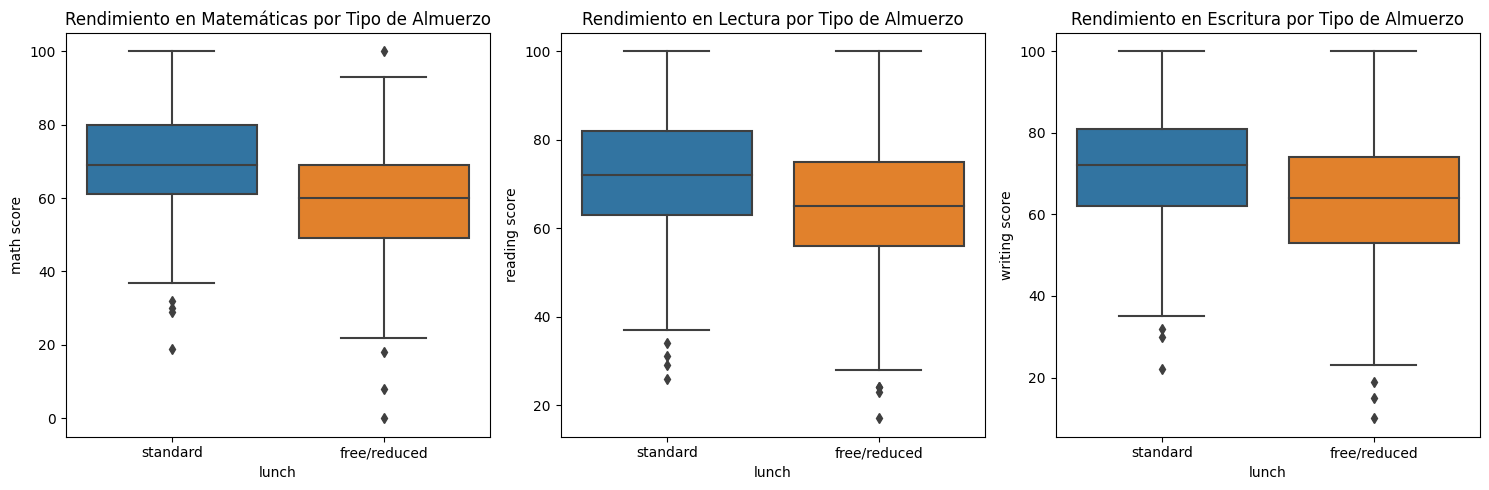

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='lunch', y='math score', data=de)
plt.title('Rendimiento en Matemáticas por Tipo de Almuerzo')

plt.subplot(1, 3, 2)
sns.boxplot(x='lunch', y='reading score', data=de)
plt.title('Rendimiento en Lectura por Tipo de Almuerzo')

plt.subplot(1, 3, 3)
sns.boxplot(x='lunch', y='writing score', data=de)
plt.title('Rendimiento en Escritura por Tipo de Almuerzo')

plt.tight_layout()
plt.show()

Chicos y chicas muestran habilidades distintas en diversas materias, destacándose los chicos en matemáticas ➕📐 y las chicas en lectura 📖 y escritura ✏️. Los estudiantes del grupo étnico E suelen obtener los puntajes más altos 🚀, mientras que el grupo A tiende a tener puntajes más bajos 😞. La educación de los padres también influye, ya que aquellos con padres más educados tienden a obtener mejores puntajes 🎓. Además, los estudiantes con almuerzos estándar 🍱 superan a quienes tienen almuerzos gratuitos o reducidos en todas las áreas 📈. Aquellos que completan cursos de preparación para exámenes tienen un rendimiento general mejor que quienes no lo hacen 📚💪.